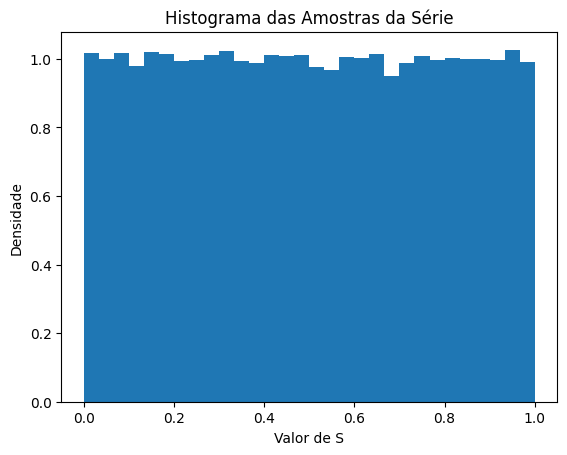

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Número de amostras
num_samples = 100000
# Número de termos na soma
N = 100

# Gerar amostras
samples = np.zeros(num_samples)
for i in range(N):
    X_i = np.random.binomial(1, 0.5, num_samples)
    samples += X_i * (2 ** -(i + 1))

# Plotar histograma
plt.hist(samples, bins=30, density=True)
plt.title('Histograma das Amostras da Série')
plt.xlabel('Valor de S')
plt.ylabel('Densidade')
plt.show()

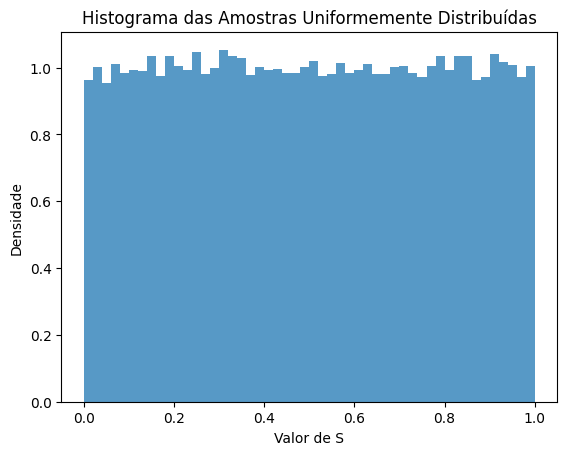

In [22]:
def uniform_random(num_samples, k=60):
    samples = np.zeros(num_samples)
    for i in range(k):
        X_i = np.random.binomial(1, 0.5, num_samples)
        samples += X_i * (2 ** -(i + 1))
    return samples

# Número de amostras
num_samples = 100000
# Valor de k para truncamento
k = 60

# Gerar amostras
samples = uniform_random(num_samples, k)

# Plotar histograma
plt.hist(samples, bins=50, density=True, alpha=0.75)
plt.title('Histograma das Amostras Uniformemente Distribuídas')
plt.xlabel('Valor de S')
plt.ylabel('Densidade')
plt.show()

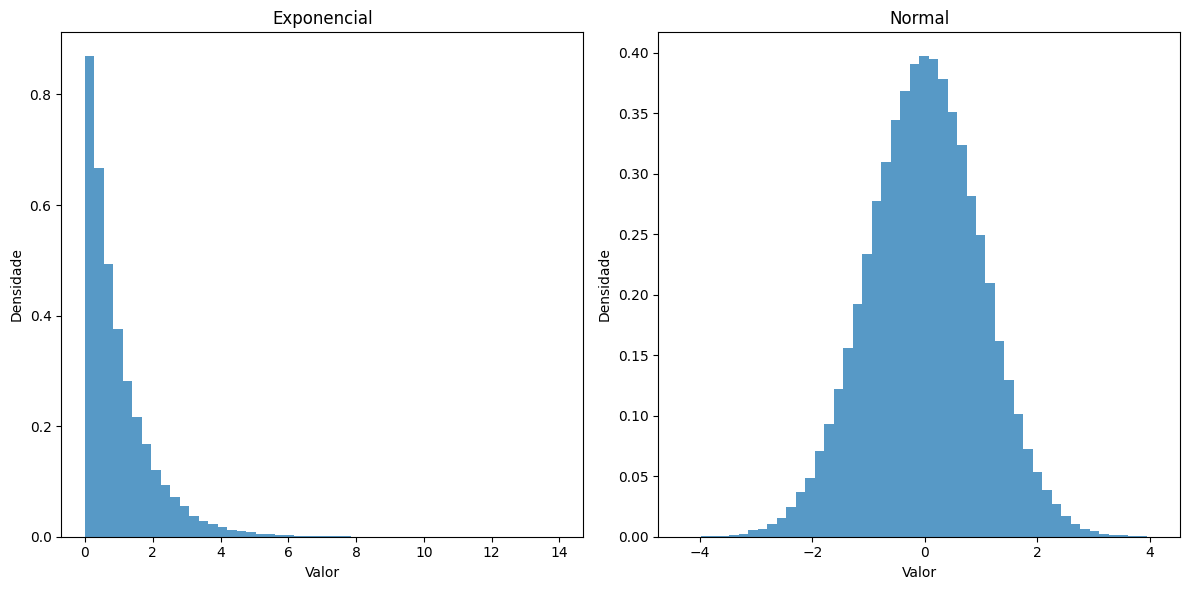

In [26]:
def exponential_random(uniform_samples, lambda_=1.0):
    return -np.log(1 - uniform_samples) / lambda_

def normal_random(num_samples):
    U1 = uniform_random(num_samples // 2)
    U2 = uniform_random(num_samples // 2)
    Z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    return np.concatenate((Z0, Z1))

# Transformar em amostras exponenciais
lambda_ = 1.0
exp_samples = exponential_random(samples, lambda_)

# Transformar em amostras normais
normal_samples = normal_random(num_samples)

# Plotar histogramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(exp_samples, bins=50, density=True, alpha=0.75)
plt.title('Exponencial')
plt.xlabel('Valor')
plt.ylabel('Densidade')

plt.subplot(1, 2, 2)
plt.hist(normal_samples, bins=50, density=True, alpha=0.75)
plt.title('Normal')
plt.xlabel('Valor')
plt.ylabel('Densidade')

plt.tight_layout()
plt.show()